In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1).to_numpy()
y = df['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)
print(f'Shapes:\nX_train: {X_train.shape}, y_train: {y_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

Shapes:
X_train: (1279, 11), y_train: (1279,)
X_test: (320, 11), y_test: (320,)


In [44]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model

input = Input(shape=X_train.shape[1:])
norm = BatchNormalization()(input)
l1 = Dense(units=50, activation='relu')(norm)
l2 = Dense(units=1)(l1)
model = Model(inputs=[input], outputs=[l2])

model.compile(
    loss='mse',
    optimizer='SGD'
)

from tensorflow.keras.callbacks import EarlyStopping

EScb = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[EScb]
    )

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 11.2837 - val_loss: 85.2925
Epoch 2/100
40/40 [==============================] - 0s 941us/step - loss: 1.1499 - val_loss: 24.0131
Epoch 3/100
40/40 [==============================] - 0s 921us/step - loss: 0.9025 - val_loss: 10.6116
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7396 - val_loss: 3.8820
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5831 - val_loss: 1.2129
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5483 - val_loss: 1.1818
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4792 - val_loss: 0.8274
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5401 - val_loss: 0.5664
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4859 - val_loss: 0.6228
Epoch 10/100
40/40 [==============================] - 0s 978us/step - loss: 0.4624 - val_loss: 0.5317

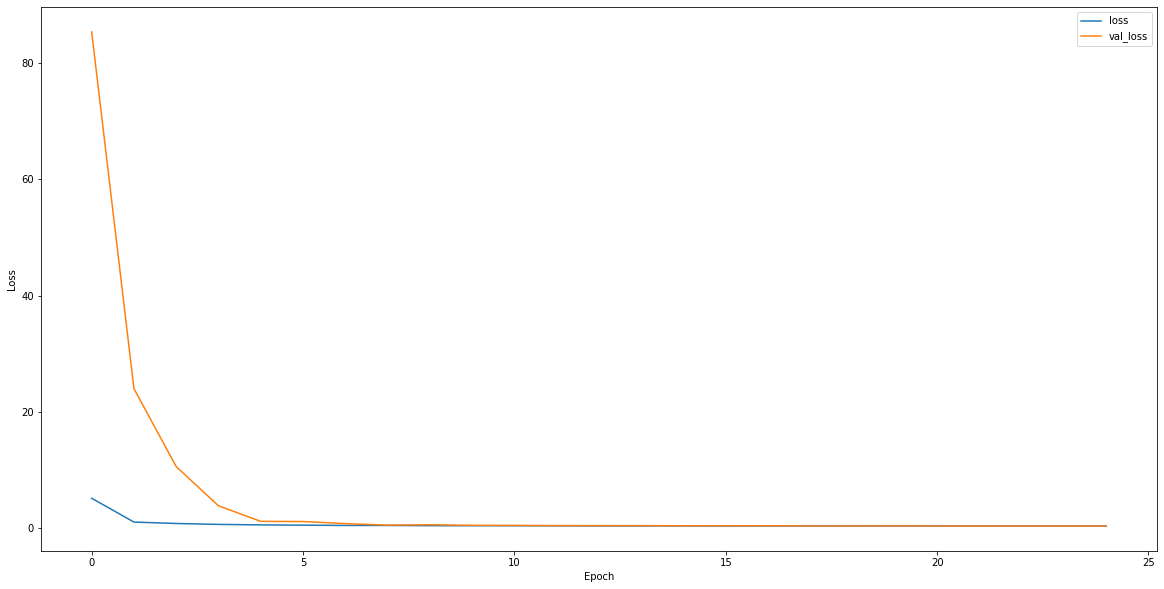

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label = 'val_loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(loc='upper right');
#plt.savefig('loss_plot.png', dpi=300)

In [50]:
import numpy as np
test = np.array([[8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983],])
model.predict(test)

array([[5.6919875]], dtype=float32)